In [15]:
#import the library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
import warnings

warnings.filterwarnings('ignore')


In [16]:
#read data
df = pd.read_csv("../../BID.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/2/2018,20664.3,19516.3,20664.3,19286.7,3.65M,5.88%
1,1/3/2018,20511.2,20664.3,20702.5,20281.6,3.09M,-0.74%
2,1/4/2018,21085.2,20511.2,21200.0,20319.9,5.56M,2.80%
3,1/5/2018,20970.4,21046.9,21085.2,20626.0,2.40M,-0.54%
4,1/8/2018,21314.8,21200.0,21582.7,20970.4,2.58M,1.64%
...,...,...,...,...,...,...,...
1487,12/15/2023,41500.0,41450.0,41700.0,41250.0,562.00K,-0.24%
1488,12/18/2023,41000.0,41050.0,41500.0,40500.0,678.40K,-1.20%
1489,12/19/2023,41200.0,41000.0,41500.0,40550.0,823.30K,0.49%
1490,12/20/2023,41300.0,41900.0,42000.0,40800.0,1.02M,0.24%


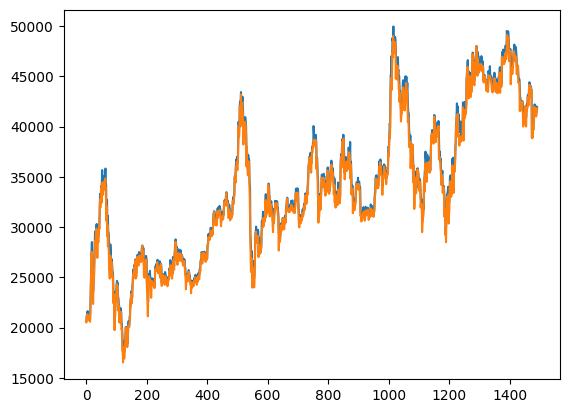

In [17]:
#Choose the independent, dependent variables
y = df[["Price"]] # predictor 
X= df[["High"]] #independent variable
plt.plot(X)
plt.plot(y)
plt.show()

In [18]:
# Split the data into training, testing sets by 9:1c
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [19]:
# params = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'loss': ['linear', 'square', 'exponential'],
#     'estimator': [None, DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=5)],
#     'random_state': [42],
# }

# # Create an AdaBoostRegressor instance
# abr = AdaBoostRegressor()

# # Create a GridSearchCV instance
# model = GridSearchCV(
#     estimator=abr,
#     param_grid=params,
#     scoring='neg_mean_squared_error',
#     verbose=1
# )

# # Fit the model
# model.fit(X_train, y_train)

# # Print the best parameters and lowest RMSE
# print("Best parameters:", model.best_params_)
# print("Lowest RMSE:", (-model.best_score_) ** 0.5)


In [20]:
#Create model with hyperparameter
model = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=50,
    learning_rate=0.01,
    loss='exponential',
    random_state=42
)

# Fit the model to the training data
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.01, loss='exponential', random_state=42)

In [21]:
#make predictions for test data
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [22]:
#calculate some metrics
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
msle = mean_squared_log_error(y_test, y_pred)
print("MAPE:", mape)
print("MAE: ",  mae)
print("RMSE:", rmse)
print("MSLE: ", msle)

MAPE: 1.2073838190133306
MAE:  534.1134009217596
RMSE: 647.0743061851961
MSLE:  0.00021550531837568698


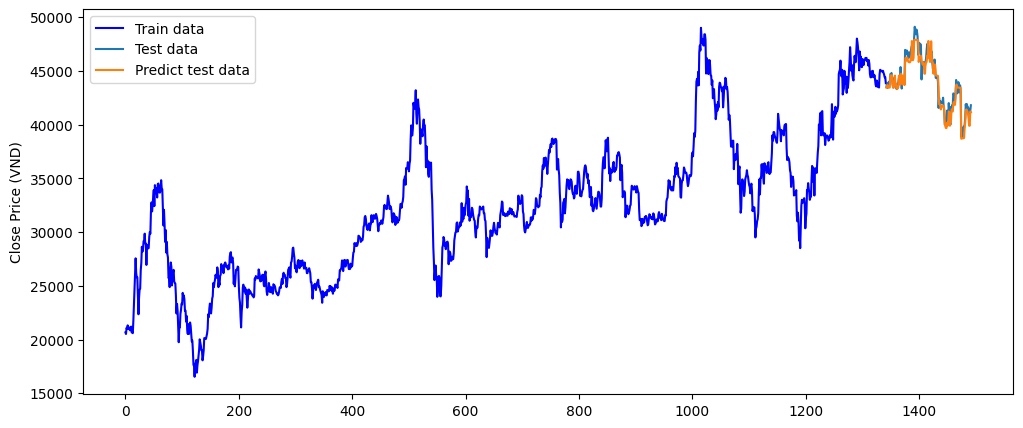

In [23]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.show()

In [24]:
#Take the last data from the test
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[41900.]])

In [25]:
#Make prediction for next 30 days
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

print("Ket qua du doan XGBoost ", x_next_30_day)


Ket qua du doan XGBoost  [array([41150.41904762]), array([40192.36666667]), array([39573.5]), array([38721.00638298]), array([38673.80869565]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429]), array([38664.88571429])]


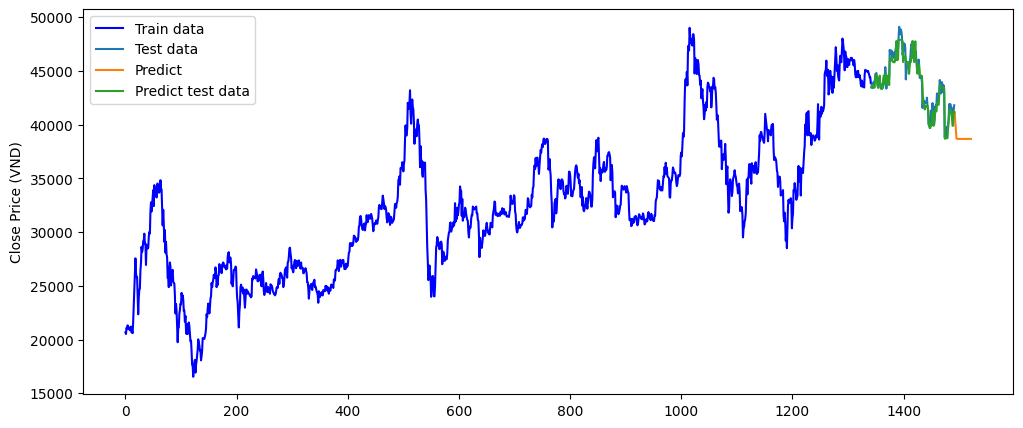

In [27]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Predict')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.show()

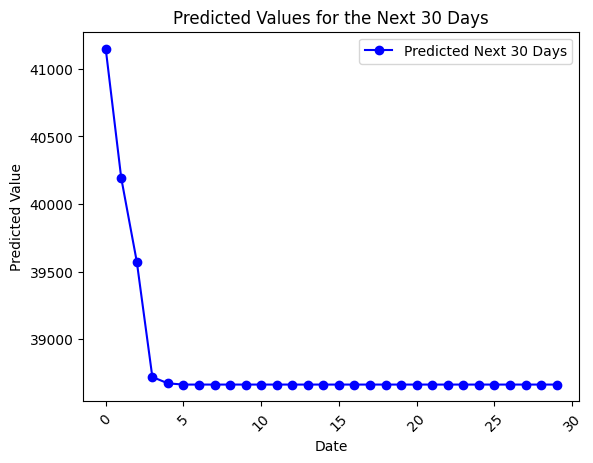

In [28]:
# Vẽ biểu đồ
plt.plot(x_next_30_day, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()